Inspired by http://www.neural.cz/dataset-exploration-california-house-pricing.html, the seaborn documentation (http://seaborn.pydata.org/api.html), the documentation and tutorial of scikit-learn (https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#linear-model-from-regression-to-sparsity)

# Looking at the data

## import some modules

In [2]:
import numpy as np # numpy is a library of scientific computation
import pandas as pd  # pandas adds dataframes (tables with headers and very powerful query tools)
import matplotlib.pyplot as plt  # matplotlib for visualization
import seaborn as sns  # seaborn extends matplotlib. Do as you prefer!  

In [3]:
# Depends on your defaults, but this could be necessary to see the plots in the notebook
%matplotlib inline  
sns.set()  # initialize seaborn

In [4]:
from sklearn import datasets  # some data sets are already distributed in sklearn
boston = datasets.load_boston()  # we can work on boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


**Question** What is this message about? Now load the california data set in the name `california` 

In [5]:
# load_boston() est une methode qui a ete retirée pour des raisons ethiques dans le dataset original
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

**Question** The attribute `DESCR` contains some information. Print it and read it. Note that you can enter

     california.<press TAB>
    
to see the list of attributes of the california object (alternative: use the `dir` command on the object).

In [6]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

**Question** According to the doc, how many attributes and how many records are there in this data set? If you see that as a matrix, what are the number of rows and columns? What describes a record? What is the target? Is it discrete or continuous?

<span style='color:green'>this data set contains 8 features and 1 output (target), it contains also 20640 records. so the dataframe contains 9*20640 table. the target is the price associated with the 8 feature in input. this is continue because the numbers are median. </span>



**Questions** Find how to see the matrix. The attribute `shape` of the matrix gives the shape. Print the matrix and its shape. 

In [7]:
print(housing.data.shape)

(20640, 8)


**Question** Print the values of the target and its shape

In [8]:
print(housing.target[:10])

[4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611]


**Question** The Python `type` function gives the type of objects. Observe the type of the data and the target. 

In [9]:
print(type(housing))
print(type(housing.target))

<class 'sklearn.utils._bunch.Bunch'>
<class 'numpy.ndarray'>


**Note**  
- A shape (n,) is a 1d array. You can think that it is a vector. 
- A shape (n, m) is a 2d array. There are 2 axis
- You can build 3d, 4d, ... arrays with more than 3, 4, ... axis. 
- Warning: (n,) is ***not equivalent*** to (n, 1) !!!  

## Using Pandas

We quickly look at Dataframes. Create a DataFrame from the california object

In [10]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)  # create a dataframe from numpy arrays
df['target'] = housing.target  # it is easy to add a column! 

**Note** : We can also fetch the data in a DataFrame.

**Question** Put your cursor between the parenthesis below and press SHIFT-TAB;. You can press + to see the doc. How do you create a dataframe using the right option? Name `californiaDF` the object created by the fetch command.

In [11]:
californiaDF = datasets.fetch_california_housing(as_frame=True)

In [12]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Question** Check the types of the attributes `data`, `target` and `frame`

In [13]:
type(californiaDF.data)

pandas.core.frame.DataFrame

**Question** Look at the data. You can also use the `head()` method call on the dataframe. 

In [14]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Question** The attribute `shape` stores the dimensions of a DataFrame. Print them

In [15]:
df.shape

(20640, 9)

**Question** What is the attribute `values` of a DataFrame? 

In [16]:
df.values

array([[   8.3252    ,   41.        ,    6.98412698, ...,   37.88      ,
        -122.23      ,    4.526     ],
       [   8.3014    ,   21.        ,    6.23813708, ...,   37.86      ,
        -122.22      ,    3.585     ],
       [   7.2574    ,   52.        ,    8.28813559, ...,   37.85      ,
        -122.24      ,    3.521     ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,   39.43      ,
        -121.22      ,    0.923     ],
       [   1.8672    ,   18.        ,    5.32951289, ...,   39.43      ,
        -121.32      ,    0.847     ],
       [   2.3886    ,   16.        ,    5.25471698, ...,   39.37      ,
        -121.24      ,    0.894     ]], shape=(20640, 9))

<span style='color:green'> the attribute values represents the table of values contained in the dataframe, including target column </span>


**Note**: Observe how to make simple queries. Each query below creates a Series or a DataFrame

In [17]:
df['MedInc']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64

In [18]:
df[['MedInc', 'AveBedrms', 'Latitude']]

,MedInc,AveBedrms,Latitude
0,8.3252,1.023810,37.88
1,8.3014,0.971880,37.86
2,7.2574,1.073446,37.85
3,5.6431,1.073059,37.85
4,3.8462,1.081081,37.85
...,...,...,...
20635,1.5603,1.133333,39.48
20636,2.5568,1.315789,39.49
20637,1.7000,1.120092,39.43
20638,1.8672,1.171920,39.43


**Question**: Make a query that creates a DataFrame with columns `AveOccup` and `Population`

In [19]:
df[['AveOccup', 'Population']]

,AveOccup,Population
0,2.555556,322.0
1,2.109842,2401.0
2,2.802260,496.0
3,2.547945,558.0
4,2.181467,565.0
...,...,...
20635,2.560606,845.0
20636,3.122807,356.0
20637,2.325635,1007.0
20638,2.123209,741.0


With `iloc` you can use index and slices (reminder: a slice `s:e:k` extracts from start `s` to end `e` (excluded) by step `k`)

In [20]:
df.iloc[0:3,0:2]

,MedInc,HouseAge
0,8.3252,41.0
1,8.3014,21.0
2,7.2574,52.0


**Question** Query rows 5 to 8 for the attributes 4 to 8

In [21]:
df.iloc[5:9,4:8]

,Population,AveOccup,Latitude,Longitude
5,413.0,2.139896,37.85,-122.25
6,1094.0,2.128405,37.84,-122.25
7,1157.0,1.788253,37.84,-122.25
8,1206.0,2.026891,37.84,-122.26


## Missing values? 

One of the first things to check is the presence of missing values (usually NaN values).

In [22]:
tmpdf = pd.DataFrame([[np.nan, 1, 2],[1, 3, 2]], columns=['A', 'B', 'C'])
tmpdf
# Probleme de version entre pc perso et pc de la fac
# AttributeError: `np.NaN` was removed in the NumPy 2.0 release. Use `np.nan` instead.

,A,B,C
0,NaN,1,2
1,1.0,3,2


In [23]:
tmpdf.describe()   # describe prints basics stats

,A,B,C
count,1.0,2.000000,2.0
mean,1.0,2.000000,2.0
std,NaN,1.414214,0.0
min,1.0,1.000000,2.0
25%,1.0,1.500000,2.0
50%,1.0,2.000000,2.0
75%,1.0,2.500000,2.0
max,1.0,3.000000,2.0


In [24]:
tmpdf.info()   # Another way using info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1 non-null      float64
 1   B       2 non-null      int64  
 2   C       2 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 180.0 bytes


Using more basic building blocks... The Pandas function `isnull` returns `True` (1) et `False` (0) values. The `sum` function sums the results (by default, columnswise).

In [25]:
pd.isnull(tmpdf)

,A,B,C
0,True,False,False
1,False,False,False


In [26]:
pd.isnull(tmpdf).sum()

A    1
B    0
C    0
dtype: int64

**Question** Are there missing values in `california`?

In [27]:
pd.isnull(californiaDF)

False

##  Descriptive Statistics

A **very important** thing to do in data analysis is to look at basic statistics and interpret them.

In [28]:
df.mean() # only the average

MedInc           3.870671
HouseAge        28.639486
AveRooms         5.429000
AveBedrms        1.096675
Population    1425.476744
AveOccup         3.070655
Latitude        35.631861
Longitude     -119.569704
target           2.068558
dtype: float64

In [29]:
df.describe() # a list of basic stats, by default on numeric attributes.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**Question** Report some observations

<span style='color:green'> I can see that it seem a correlation between latitude and longitude </span>


## Correlations

The correlation study provides more information on the data. We are interested in looking at the correlations between attributes and correlations between an attribute and the target. 

Correlations are values between -1 and +1. If the variable are independent then the value is 0. A value of +1 (or -1) means, in rough terms, that both variables change in the same (or opposite) direction. (More information on [the wikipedia page](https://en.wikipedia.org/wiki/Correlation)).

Looking at correlations betwen an attribute and the target is a first step towards ML models. If there exist attributes correlated with the target then it means that those attributes carry some information about the target that will be usefull to build a ML model. 

If two attributes are higly correlated, we may have redundant information and we may want to remove one of them. This is not a rule at all, you will see that in the following...

In [30]:
correlations = df.corr(method='pearson')  # looking at linear correlations

In [31]:
correlations

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


**Question** Comment the correlations.

<span style='color:green'> the correlation between longitude and latitude is confirmed, this can may be explained by the california state shape 
I can also see a correlation between average rooms and average beds</span>


**Question** Explain what the following expression is doing. 

In [32]:
correlations.iloc[-1,:-1].abs().sort_values()

AveOccup      0.023737
Population    0.024650
Longitude     0.045967
AveBedrms     0.046701
HouseAge      0.105623
Latitude      0.144160
AveRooms      0.151948
MedInc        0.688075
Name: target, dtype: float64

<span style='color:green'> this expression takes the correlation of the target with all features in absolute value and sort them in ascending order to highlight features are most correlated with the target </span>


### Draw correlations

`Seaborn` is an extension of `matplotlib` that simplifies some drawings. For instance, a code in matplotlib that does a similar result than the next cell is given [here](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).

<Axes: >

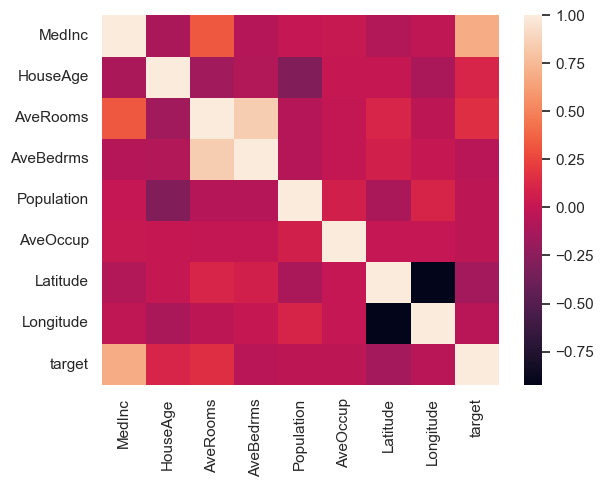

In [33]:
sns.heatmap(correlations)

**Question**: High correlation are close to +1 and -1. Could you modify the previous cell to draw high correlations with the same color?

<Axes: >

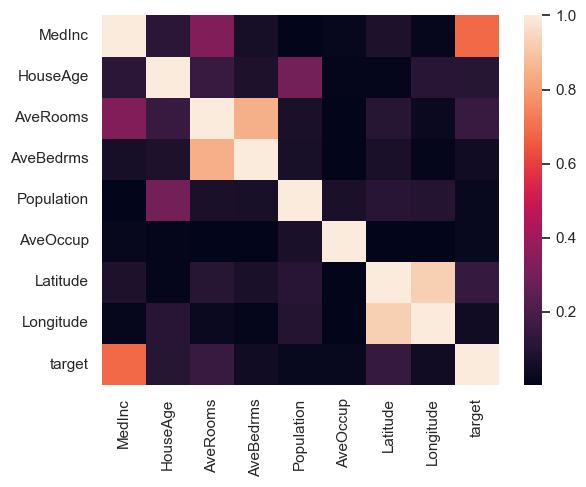

In [34]:
sns.heatmap(correlations.abs())

## Draw density estimations, histograms,...

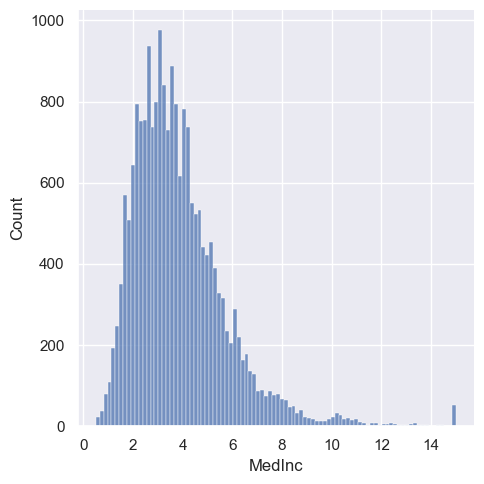

In [35]:
sns.displot(df['MedInc'])

<Axes: xlabel='MedInc', ylabel='Density'>

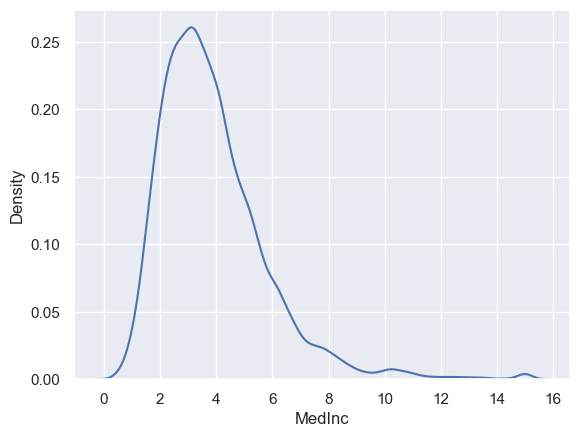

In [36]:
sns.kdeplot(df['MedInc'])

**Question** Reproduce the plots for another attribute. 

<Axes: xlabel='HouseAge', ylabel='Density'>

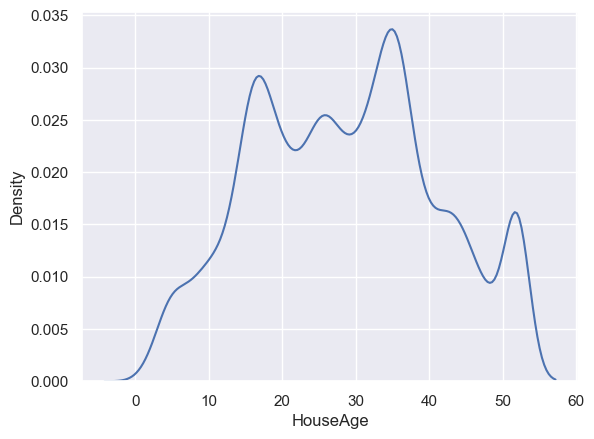

In [37]:
sns.kdeplot(df['HouseAge'])

### Scatter plots

Scatter plots are points plotted in a diagram. You can use matplotlib (function [scatter](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html)) or Seaborn (function [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)).

**Question** Draw a simple scatter plot in matplotlib where `x` is `Longitude` and `y` is `Latitude`.

<Axes: xlabel='Longitude', ylabel='Latitude'>

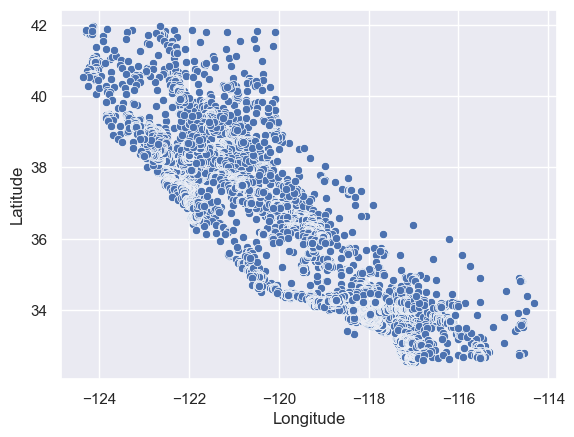

In [38]:
sns.scatterplot(data=df, x="Longitude", y="Latitude")

**Question** Back to the correlations... Are you surprised by the plot? Was it possible to guess it?

<span style= 'color:green'>It s not that surprizing, it's the shape of the state</span>


**Question** Reproduce the plot using Seaborn [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). Use parameters `hue` and `size` so that the color and the size of points depend on the target value. Where would you like to leave in California (or to go to see expensive households)?

<Axes: xlabel='Longitude', ylabel='Latitude'>

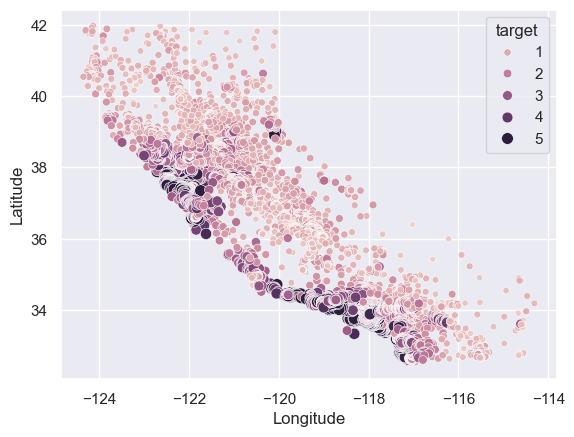

In [39]:
sns.scatterplot(data=df, x="Longitude", y="Latitude", hue="target", size="target")



**Question** You can draw density estimations with `jointplot` (`kind` is `kde` or `scatter`) in `seaborn`.

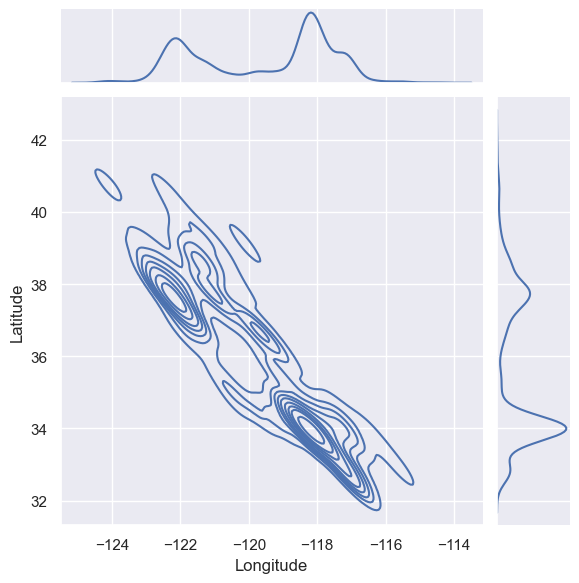

In [40]:
sns.jointplot(data=df, x="Longitude", y="Latitude", kind="kde")

**Question** Draw a density estimation of the target (histogram).

<Axes: xlabel='target', ylabel='Count'>

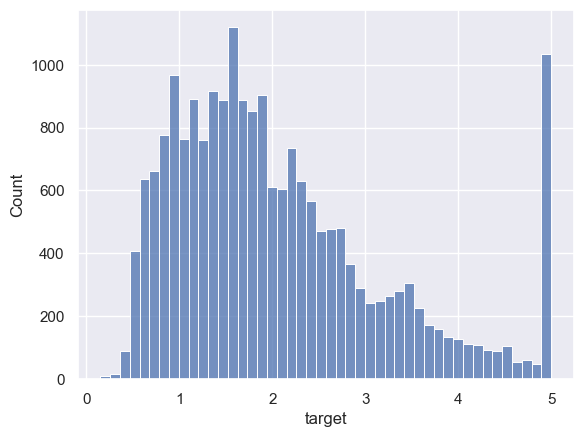

In [41]:
sns.histplot(data=df, x='target')

**Question** What is surprising? Do you have any interpretation of that?

<span style='color:green'> this can be explained, the majority of houses are priced below 500k$
in the dataset, target = 5 significate 500 000$, this create a histogram with a main bell-shaped distribution and an isolated peak on the right, which is not a true outlier but a result of this capping </span>


## We remove data!

**Question** Create a datadrame `df5` with blocks whose target value is below 5.

In [42]:
df5 = df[df['target']<5]
df5.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Build a simple prediction model

We want to build a predictive model for the target. This means that we suppose we know the 8 attributes and we want to guess the target. The target value is continuous. This is a regression task and we will build a simple linear regression model.

## Learn a linear model

**Question** Read this page on [linear lodels](https://scikit-learn.org/stable/modules/linear_model.html). Import `linear_model`.

In [43]:
from sklearn import linear_model as lm

**Question** Create an instance named `lr` that will be used to learn a linear regression model.

In [44]:
lr = lm.LinearRegression()

We want to build a **prédiction** model and we want to estimate how good this model will be at predicting values (mean of prices of households) for **new data** (blocks described by the 8 attributes for which the target value is unknown). This is difficult because we have to wait for sales to be made. We will simulate this by splitting the current data set into 2 parts: 

- the first part is the **training set** to learn the linear model.
- the second part is the **test set** to evaluate the performance of the model

Sklearn implements the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) function that does exactly that (with some pseudo-randomization). 

**Question** : import `train_test_split`.

In [45]:
from sklearn.model_selection import train_test_split

**Question** You have learn in the previous questions what represents the attribute `values` of a `DataFrame`. Recall that you can apply slices on ndarrays (and also on DataFrames but with `iloc`). Define a name `X` for the `ndarray` of `df5` but without the column `target`.

In [46]:
x = df5.iloc[:, :-1].values
print(x.shape)


(19648, 8)


**Question** Define a name `y` for the `ndarray` associated with the target column of `df5`. The shapes of `X` and `y` should be `(19648, 8)` and `(19648,)`.

In [47]:
y = df5['target'].values
print(x.shape)
print(y.shape)

(19648, 8)
(19648,)


For the reproducibility of experiments, you can fix the seed of the pseudo-random generator. In many sklearn or numpy functions, it is the parameter `random_state`. 

**Question** With `train_test_split` on `X` and `y`, define `X_train`, `X_test`, `y_train`, `y_test` such that the size of the test set is 1/3 of the whole data set. You can fix the random seed to 42. 

You should obtain the following shapes:

    ((13164, 8), (6484, 8), (20640, 8), (13164,), (6484,))

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) #test_size doit etre = 0.33 et non 1/3 pour correspondre aux valeurs attendues
print((x_train.shape, x_test.shape, y_train.shape, y_test.shape)) # on doit definir 4 tuples mais on doit en obtenir 5? le tuple manquant correspond a housing.data.shape


((13164, 8), (6484, 8), (13164,), (6484,))


**Question**. Fit the model using the training set following the examples you can find in [the documentation](https://scikit-learn.org/stable/modules/linear_model.html).

In [49]:
lr.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


You have learned the $w$ parameters of a model of the form: $y = w_0+\sum_{i=1}^p w_ix_i$. When $p=1$, this equation defines a line of slope $w_1$ and intercept $w_0$. 

**Question**  What is the value of $p$ in our case? 

<span style='color:green'>in this case, p represents the number of feature, so 8 </span>



**Question** What is the value of $w_0$? What are the values of $w_i$.  

In [50]:
w0 = lr.intercept_
print(w0)
print(lr.coef_)

-33.55533533962628
[ 4.25298599e-01  8.05997018e-03 -9.88950288e-02  5.55935657e-01
  6.73799259e-06 -3.25530318e-03 -3.78989590e-01 -3.94086126e-01]


**Question** Can you give the prediction of the model if the input is a record where all values are 0?

In [54]:
zero_inputs = [0 for i in range (8)]
print(lr.predict([zero_inputs])) # on observe que w0 = lr.intercept = lr.predict([0,0,0,0,0,0,0,0])

[-33.55533534]


**Question** Define `predictions_train` for the vector of predictions of all records in `X_train`. Print the prediction for the first record and the real value.

In [55]:
predictions_train = lr.predict(x_train)
print("Prediction   :", predictions_train[0])
print("Actual value :", y_train[0])

Prediction   : 0.8566923759338039
Actual value : 1.813


**Question** Using the method `score` of the `lr` object, compute the score of the model on the test set.

In [56]:
print(lr.score(x_test, y_test))

0.5665912793241737


**Question** Define `predictions_test` as the vector of  predictions on the test set.

In [57]:
predictions_test = lr.predict(x_test)
# première prédiction et valeur réelle du test set
print("First prediction:", predictions_test[0])
print("Actual value:", y_test[0])


First prediction: 2.779554195416452
Actual value: 3.298


**Question** Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) of the score function.  Using the numpy functions `sum` and `mean`, do the computation of the score yourself. 

In [ ]:
y_mean = np.mean(y_test) #moyenne des valeurs de target
u = np.sum((y_test - predictions_train) ** 2) #comparaison entre les valeur attendue et les predictions
v = np.sum((y_test - y_mean) ** 2) #comparaison entre les valeurs attendues et la moyenne
#c est une maniere de verifier que le modele est plus propice a predire quelque chose que de simplement calculer la moyenne

1.9215596822948797


How much the predicted values are far from the real ones? We can try to plot a diagram that illustrate this. On the `x` axis we have the predicted value, on the `y` axis the real value. A diagonal means that we have a perfect prediction! 

**Question** Draw this diagram with `plt.scatter`.

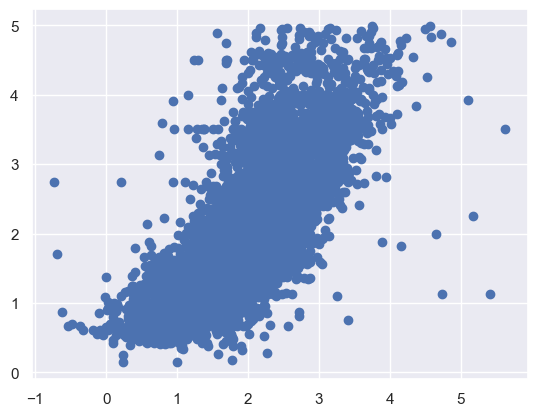

In [62]:
plt.scatter(predictions_test, y_test)